# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [92]:
import scipy.stats
import statsmodels.api as sm
import statsmodels.stats.api as sms

# 2. Collect and load data

In [93]:
df=pd.read_csv('bigcity.csv')
df.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


In [94]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [95]:
df.head()

,u,x
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75


In [96]:
df.shape

(49, 2)

# 3. Explore numeric variables - five number summary

In [97]:
df.describe()

,u,x
count,49.000000,49.000000
mean,103.142857,127.795918
std,104.405061,123.121211
min,2.000000,46.000000
25%,43.000000,58.000000
50%,64.000000,79.000000
75%,120.000000,130.000000
max,507.000000,634.000000


# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

### 3a.

<AxesSubplot:ylabel='x'>

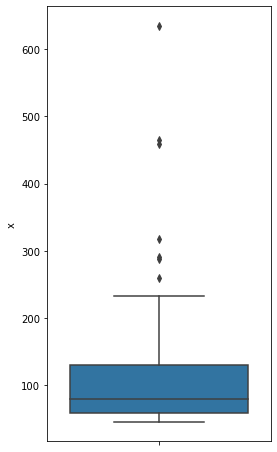

In [98]:
plt.figure(figsize=(4,8))
sns.boxplot(y=df['x'])

<AxesSubplot:ylabel='u'>

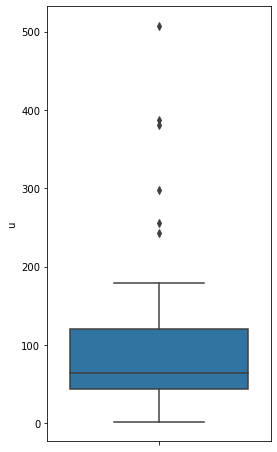

In [99]:
plt.figure(figsize=(4,8))
sns.boxplot(y=df['u'])

<AxesSubplot:xlabel='u', ylabel='Count'>

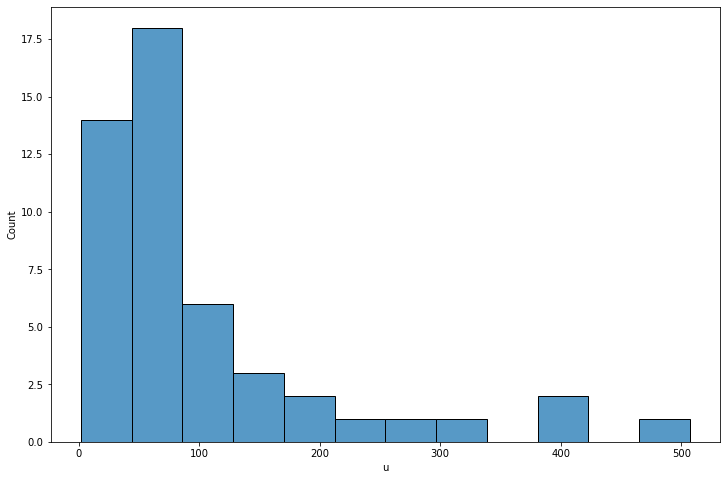

In [100]:
plt.figure(figsize=(12,8))
sns.histplot(x=df['u'])

<AxesSubplot:xlabel='x', ylabel='Count'>

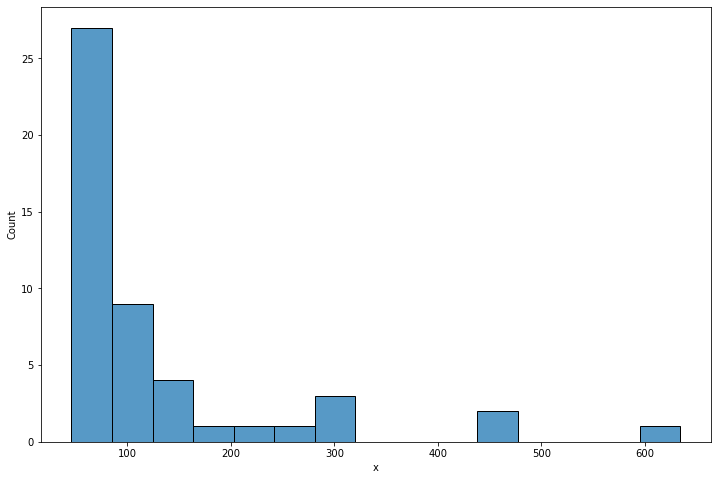

In [101]:
plt.figure(figsize=(12,8))
sns.histplot(x=df['x'])

### 3b.

In [102]:
u_mean=df['u'].mean()
print('Mean of variable u: ',u_mean)

Mean of variable u:  103.14285714285714


In [103]:
u_var=df['u'].var()
print('Variance of variable u: ',u_var)

Variance of variable u:  10900.416666666662


In [104]:
u_std=df['u'].std() 
print('Standard Deviation of variable u: ',u_std)

Standard Deviation of variable u:  104.40506054146351


In [105]:
x_mean=df['x'].mean()
print('Mean of variable x: ',x_mean)

Mean of variable x:  127.79591836734694


In [106]:
x_var=df['x'].var()
print('Variance of variable x: ',x_var)

Variance of variable x:  15158.832482993197


In [107]:
x_std=df['x'].std()
print('Standard Deviation of variable x: ',x_std)

Standard Deviation of variable x:  123.12121053252034


# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

<AxesSubplot:xlabel='x', ylabel='u'>

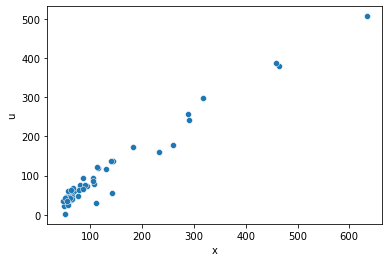

In [108]:
sns.scatterplot(df['x'],df['u'])

# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [109]:
df.shape

(49, 2)

In [110]:
input_x=df['u']
input_x.head()

0    138
1     93
2     61
3    179
4     48
Name: u, dtype: int64

In [111]:
target_y=df['x']
target_y.head()

0    143
1    104
2     69
3    260
4     75
Name: x, dtype: int64

# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [112]:
df.isna().sum()

u    0
x    0
dtype: int64

<AxesSubplot:>

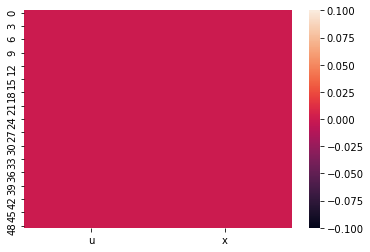

In [113]:
sns.heatmap(df.isnull())

In [114]:
df.corr()

,u,x
u,1.000000,0.981742
x,0.981742,1.000000


<AxesSubplot:>

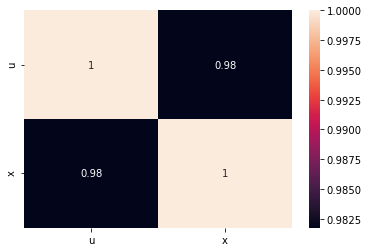

In [115]:
sns.heatmap(df.corr(),annot=True)

#### Conclusion:
    1.There are no null values in the dataset.
    2.There is strong positive correlation between variable u and x.

The high correlation between u and x indicates that the variable u is a good predictor of variable x

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
x_train,x_test,y_train,y_test=train_test_split(df['x'],df['u'],random_state=1,test_size=0.2)

print('X Train size: ',x_train.shape)
print('X Test size: ',x_test.shape)
print('Y Train size: ',y_train.shape)
print('Y Test size: ',y_test.shape)


X Train size:  (39,)
X Test size:  (10,)
Y Train size:  (39,)
Y Test size:  (10,)


In [118]:
x_train=pd.DataFrame(x_train)
x_train.head()

,x
31,46
38,113
21,57
35,183
19,459


In [119]:
y_train=pd.DataFrame(y_train)
y_train.head()

,u
31,36
38,121
21,60
35,172
19,387


# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [120]:
import sklearn

In [121]:
from sklearn.linear_model import LinearRegression

In [122]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print('Intercept of the model is: ',regressor.intercept_)

Intercept of the model is:  [-4.81913523]


In [123]:
print('Coefficient of the model is: ',regressor.coef_)

Coefficient of the model is:  [[0.83506535]]


# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

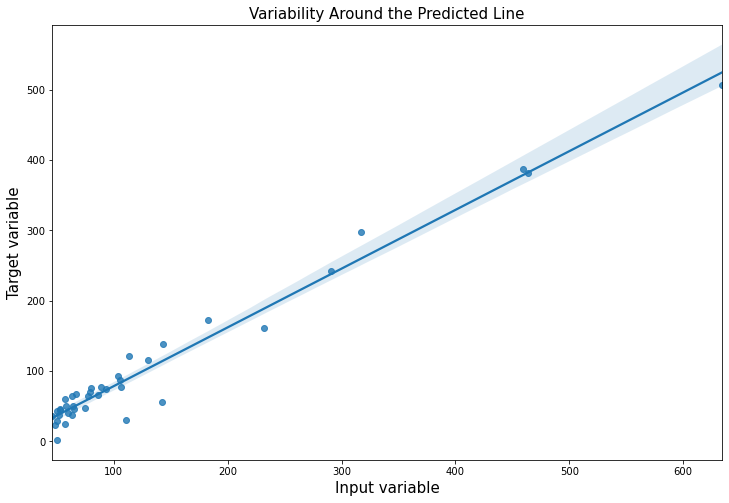

In [124]:
plt.figure(figsize=(12,8))
sns.regplot(x_train,y_train)
plt.xlabel('Input variable',fontsize=15)
plt.ylabel('Target variable',fontsize=15)
plt.title('Variability Around the Predicted Line', fontsize = 15)
plt.show()

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [125]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [126]:
x_train.head()

,x
31,46
38,113
21,57
35,183
19,459


In [127]:
y_train.head()

,u
31,36
38,121
21,60
35,172
19,387


In [128]:
model=sm.OLS(y_train,x_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      u   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2148.
Date:                Sat, 21 Aug 2021   Prob (F-statistic):                    4.76e-35
Time:                        23:08:37   Log-Likelihood:                         -172.12
No. Observations:                  39   AIC:                                      346.2
Df Residuals:                      38   BIC:                                      347.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [129]:
y_train_pred=model.predict(x_train)

In [130]:
mse_train=mean_squared_error(y_train,y_train_pred)

In [131]:
rmse_train = round(np.sqrt(mse_train), 4)
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

Root Mean Squared Error (RMSE) on training set:  19.973


In [132]:
y_test_pred=model.predict(x_test)

In [133]:
mse_test = mean_squared_error(y_test,y_test_pred)

In [134]:
rmse_test = round(np.sqrt(mse_test), 4)
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on test set:  19.0537


# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [135]:
from sklearn.metrics import accuracy_score

In [147]:
print('Accuracy of the training data: ',accuracy_score(y_train,x_train))

Accuracy of the training data:  0.02564102564102564


In [148]:
print('Accuracy of the testing data : ',accuracy_score(y_test,x_test))

Accuracy of the testing data :  0.0


------------------------------------